# Langmuir-enhanced entrainment

This notebook reproduces Fig. 15 of [Li et al., 2019](https://doi.org/10.1029/2019MS001810).

In [1]:
import sys
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt                                                                                        
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
sys.path.append("../../../gotmtool")
from gotmtool import *

In [2]:
def plot_hLL_dpedt(hLL, dpedt, casename_list, ax=None, xlabel_on=True):
    if ax is None:                                                                                                     
        ax = plt.gca()
    idx_WD05 = [('WD05' in casename) for casename in casename_list]
    idx_WD08 = [('WD08' in casename) for casename in casename_list]
    idx_WD10 = [('WD10' in casename) for casename in casename_list]
    b0_str = [casename[2:4] for casename in casename_list]
    b0 = np.array([float(tmp[0])*100 if 'h' in tmp else float(tmp) for tmp in b0_str])
    b0_min = b0.min()
    b0_max = b0.max()
    ax.plot(hLL, dpedt, color='k', linewidth=1, linestyle=':', zorder=1)
    im = ax.scatter(hLL[idx_WD05], dpedt[idx_WD05], c=b0[idx_WD05], marker='d', edgecolors='k',
               linewidth=1, zorder=2, label='$U_{10}=5$ m s$^{-1}$', cmap='bone_r', vmin=b0_min, vmax=b0_max)
    ax.scatter(hLL[idx_WD08], dpedt[idx_WD08], c=b0[idx_WD08], marker='s', edgecolors='k',
               linewidth=1, zorder=2, label='$U_{10}=8$ m s$^{-1}$', cmap='bone_r', vmin=b0_min, vmax=b0_max)
    ax.scatter(hLL[idx_WD10], dpedt[idx_WD10], c=b0[idx_WD10], marker='^', edgecolors='k',
               linewidth=1, zorder=2, label='$U_{10}=10$ m s$^{-1}$', cmap='bone_r', vmin=b0_min, vmax=b0_max)
    ax.legend(loc='upper left')
    # add colorbar
    ax_inset = inset_axes(ax, width="30%", height="3%", loc='lower right',
                          bbox_to_anchor=(-0.05, 0.1, 1, 1),
                          bbox_transform=ax.transAxes,
                          borderpad=0,)
    cb = plt.colorbar(im, cax=ax_inset, orientation='horizontal', shrink=0.35,
                     ticks=[5, 100, 300, 500])
    cb.ax.set_xticklabels(['-5','-100','-300','-500'])
    ax.text(0.75, 0.2, '$Q_0$ (W m$^{-2}$)', color='black', transform=ax.transAxes,
             fontsize=10, va='top', ha='left')
    # get axes ratio
    ll, ur = ax.get_position() * plt.gcf().get_size_inches()
    width, height = ur - ll
    axes_ratio = height / width
    # add arrow and label
    add_arrow(ax, 0.6, 0.2, 0.3, 0.48, axes_ratio, color='gray', text='Increasing Convection')
    add_arrow(ax, 0.3, 0.25, -0.2, 0.1, axes_ratio, color='black', text='Increasing Langmuir')
    add_arrow(ax, 0.65, 0.75, -0.25, 0.01, axes_ratio, color='black', text='Increasing Langmuir')
    ax.set_xscale('log')
    ax.set_yscale('log')
    if xlabel_on:
        ax.set_xlabel('$h/\kappa L$', fontsize=14)
    ax.set_ylabel('$d\mathrm{PE}/dt$', fontsize=14)
    ax.set_xlim([3e-3, 4e1])
    ax.set_ylim([2e-4, 5e-2])
    # set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)

def plot_hLL_R(hLL, R, colors, legend_list, ax=None, xlabel_on=True):
    if ax is None:                                                                                                     
        ax = plt.gca()
    ax.axhline(y=1, linewidth=1, color='black')
    nm = R.shape[0]
    for i in np.arange(nm):
        ax.scatter(hLL, R[i,:], color=colors[i], edgecolors='k', linewidth=0.5, zorder=10)
    ax.set_xscale('log')
    ax.set_xlim([3e-3, 4e1])
    if xlabel_on:
        ax.set_xlabel('$h/L_L$', fontsize=14)
    ax.set_ylabel('$R$', fontsize=14)
    # set the tick labels font
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(14)
    # legend
    if nm > 1:
        xshift = 0.2 + 0.05*(11-nm)
        xx = np.arange(nm)+1
        xx = xx*0.06+xshift
        yy = np.ones(xx.size)*0.1
        for i in np.arange(nm):
            ax.text(xx[i], yy[i], legend_list[i], color='black', transform=ax.transAxes,
                     fontsize=12, rotation=45, va='bottom', ha='left')
            ax.scatter(xx[i], 0.07, s=60, color=colors[i], edgecolors='k', linewidth=1, transform=ax.transAxes)

def add_arrow(ax, x, y, dx, dy, axes_ratio, color='black', text=None):
    ax.arrow(x, y, dx, dy, width=0.006, color=color, transform=ax.transAxes)
    if text is not None:
        dl = np.sqrt(dx**2+dy**2)
        xx = x + 0.5*dx + dy/dl*0.06
        yy = y + 0.5*dy - dx/dl*0.06
        angle = np.degrees(np.arctan(dy/dx*axes_ratio))
        ax.text(xx, yy, text, color=color, transform=ax.transAxes, fontsize=11,
                rotation=angle, va='center', ha='center')

### Load LF17 data

In [3]:
# load LF17 data
lf17_data = np.load('LF17_dPEdt.npz')
us0    = lf17_data['us0']
b0     = lf17_data['b0']
ustar  = lf17_data['ustar']
hb     = lf17_data['hb']
dpedt  = lf17_data['dpedt']
casenames = lf17_data['casenames']
ncase = len(casenames)

# get parameter h/L_L= w*^3/u*^2/u^s(0)
inds = us0==0
us0[inds] = np.nan
hLL = b0*hb/ustar**2/us0

### Compute the rate of change in potential energy in GOTM runs

In [4]:
turbmethods = [
    'GLS-C01A',
    'KPP-CVMix',
    'KPPLT-VR12',
    'KPPLT-LF17',
    ]
ntm = len(turbmethods)
cmap = cm.get_cmap('rainbow')
if ntm == 1:
    colors = ['gray']
else:
    colors = cmap(np.linspace(0,1,ntm))


In [5]:
m = Model(name='Entrainment-LF17', environ='../../.gotm_env.yaml')
gotmdir = m.environ['gotmdir_run']+'/'+m.name
print(gotmdir)

/Users/qingli/develop/dev_gotmtool/gotm/run/Entrainment-LF17


In [6]:
# Coriolis parameter (s^{-1})
f = 4*np.pi/86400*np.sin(np.pi/4)
# Inertial period (s)
Ti = 2*np.pi/f
# get dPEdt from GOTM run
rdpedt = np.zeros([ntm, ncase])
for i in np.arange(ntm):
    print(turbmethods[i])
    for j in np.arange(ncase):
        sim = Simulation(path=gotmdir+'/'+casenames[j]+'/'+turbmethods[i])
        var_gotm = sim.load_data().Epot
        epot_gotm = var_gotm.data.squeeze()
        dtime = var_gotm.time - var_gotm.time[0]
        time_gotm = (dtime.dt.days*86400.+dtime.dt.seconds).data
        # starting index for the last inertial period
        t0_gotm = time_gotm[-1]-Ti
        tidx0_gotm = np.argmin(np.abs(time_gotm-t0_gotm))
        # linear fit
        xx_gotm = time_gotm[tidx0_gotm:]-time_gotm[tidx0_gotm]
        yy_gotm = epot_gotm[tidx0_gotm:]-epot_gotm[tidx0_gotm]
        slope_gotm, intercept_gotm, r_value_gotm, p_value_gotm, std_err_gotm = stats.linregress(xx_gotm,yy_gotm)
        rdpedt[i,j] = slope_gotm/dpedt[j]

GLS-C01A
KPP-CVMix
KPPLT-VR12
KPPLT-LF17


Text(0.88, 0.94, '(b)')

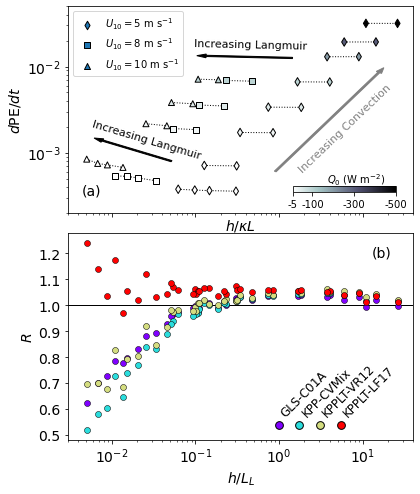

In [7]:
fig, axarr = plt.subplots(2, 1, sharex='col')
fig.set_size_inches(6, 7)
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.09, top=0.95, hspace=0.1)
plot_hLL_dpedt(hLL, dpedt, casenames, ax=axarr[0])
plot_hLL_R(hLL, rdpedt, colors, turbmethods, ax=axarr[1])
axarr[0].text(0.04, 0.14, '(a)', color='black', transform=axarr[0].transAxes,
             fontsize=14, va='top', ha='left')
axarr[1].text(0.88, 0.94, '(b)', color='black', transform=axarr[1].transAxes,
             fontsize=14, va='top', ha='left')